## KNN Implementation from scratch

In [ ]:
# importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Step - 1**: Load the data

In [ ]:
# Loding dataset into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Datasets/diamonds.csv")

**Step - 2**: Perform the EDA on the given dataset



In [ ]:
# first 5 observation in the dataset
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# rename the columns 
data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth percent", "table": "table percent"},inplace = True)

In [ ]:
# last 5 observation in the dataset
data.tail()

,carat,cut,color,clarity,depth percent,table percent,price,length,width,depth
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
# checking for missing values in the dataset
data.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth percent    0
table percent    0
price            0
length           0
width            0
depth            0
dtype: int64

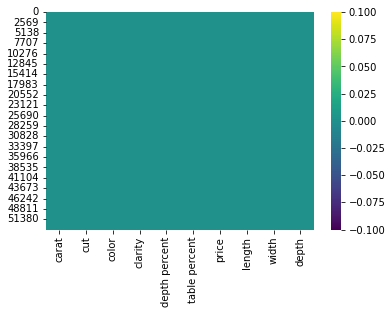

In [ ]:
# visualizing the missing values
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')

Bingo! There is no missing value present in the datatset.

In [ ]:
# Getting information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth percent  53940 non-null  float64
 5   table percent  53940 non-null  float64
 6   price          53940 non-null  int64  
 7   length         53940 non-null  float64
 8   width          53940 non-null  float64
 9   depth          53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
# checking for wrong entries like symbols -,?,#,*, etc.
for col in data.columns:
  print(f"{col} : {data[col].unique()}")

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

There is no symbol like this -,?,#,*,etc.

Data Visualizations

In [ ]:
# correlation between features
data.corr()

,carat,depth percent,table percent,price,length,width,depth
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth percent,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table percent,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
depth,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


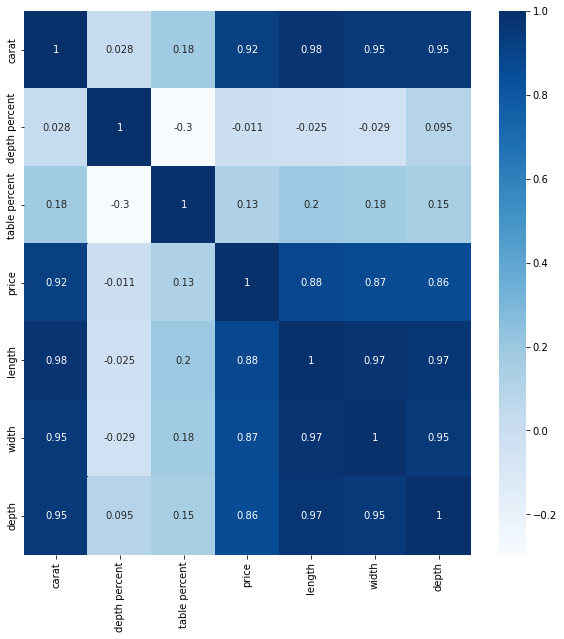

In [ ]:
# plotting correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

Here carat , x, y, z columns are positivly correlated with price.

Table and depth are negative correlated with price.

In [ ]:
data.head()

,carat,cut,color,clarity,depth percent,table percent,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


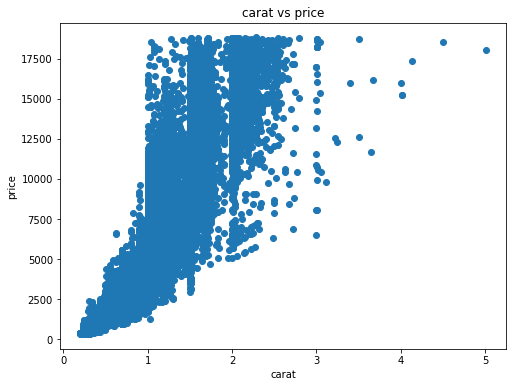

In [ ]:
# let's see how carat affect the price
plt.figure(figsize=(8,6))
plt.scatter(x='carat', y='price', data=data)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('carat vs price')
plt.show()

In [ ]:
# unique values in the cut columns
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

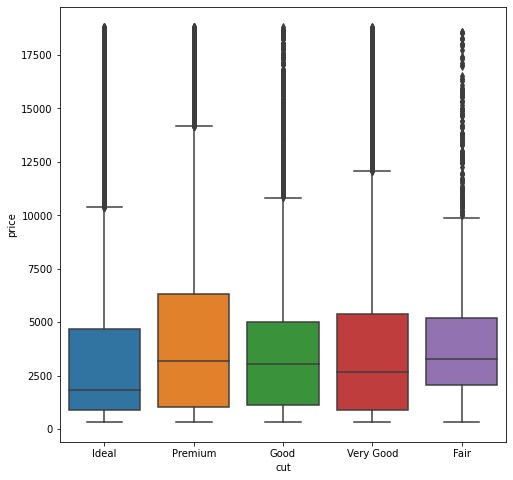

In [ ]:
# Relation between cut and price
plt.figure(figsize=(8,8))
sns.boxplot(x = 'cut', y = 'price', data=data)

Here we can see that in cut of dianmonds category there are Ideal, Good Cut, and Fair has more outliers compare to Premium and Very Good cut category.

In [ ]:
# unique value  in the clarity column
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

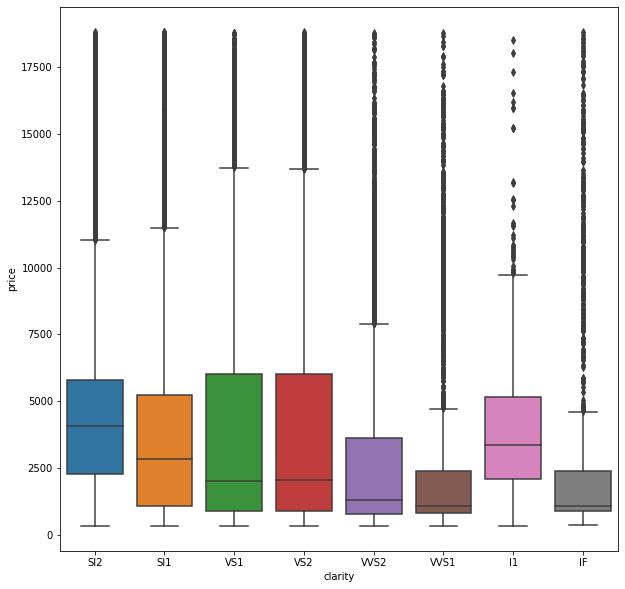

In [ ]:
# Relation between clarity and price
plt.figure(figsize=(10,10))
sns.boxplot(y ='price', x = 'clarity', data=data)

Here from above graph we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

In [ ]:
# unique value of diamond related to color
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

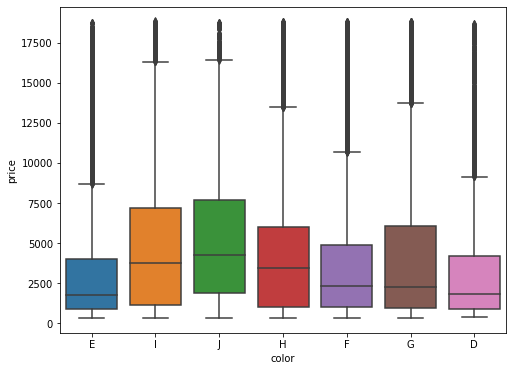

In [ ]:
# plotting graph between color and price
plt.figure(figsize=(8,6))
sns.boxplot(x='color', y='price', data=data)

From the above plot we can see that G,H,I and J type color has less number of outliers compared to D and E.

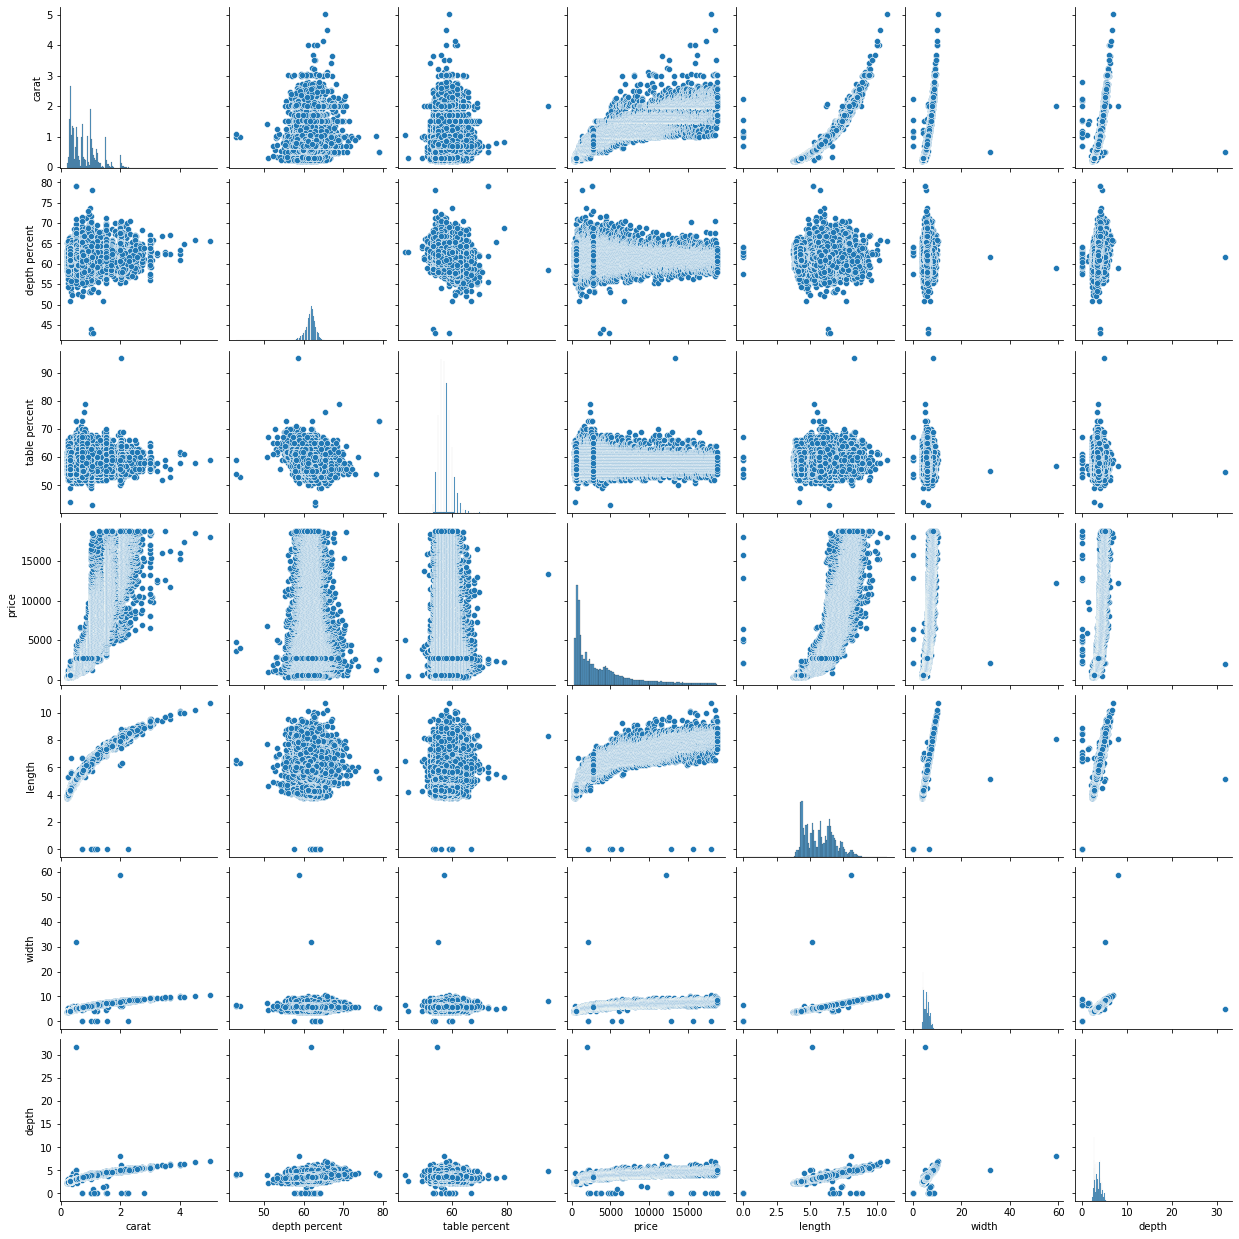

In [ ]:
# Let's plot pairplot to visualize the data
sns.pairplot(data)

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm')

,carat,depth percent,table percent,price,length,width,depth
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth percent,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table percent,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
depth,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Step - 3**: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)



In [ ]:
# import label encoder to convert categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['cut'] = encoder.fit_transform(data['cut'])
data['color'] = encoder.fit_transform(data['color'])
data['clarity'] = encoder.fit_transform(data['clarity'])

In [ ]:
data.head()

,carat,cut,color,clarity,depth percent,table percent,price,length,width,depth
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.head()

,carat,cut,color,clarity,depth percent,table percent,price,length,width,depth
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Data Preparation

In [ ]:
target = data['price']
data = data.drop('price', axis=1)

In [ ]:
data

,carat,cut,color,clarity,depth percent,table percent,length,width,depth
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


**Step 4 :** Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['carat', 'depth percent','table percent','length','width','depth']
norm_train_data = rescale.fit_transform(data.loc[:, num_features])

print(norm_train_data.shape, type(norm_train_data))


(53940, 6) <class 'numpy.ndarray'>


**Step - 5:** Split the data - Test and Train (recommended 75:25 split)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_train_data, target, test_size=0.75)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13485, 6) (40455, 6) (13485,) (40455,)


In [ ]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [ ]:
type(X_train)

numpy.ndarray

KNN implementation using Numpy Broadcasting

In [ ]:
distance = np.zeros(y_test.shape)
y_test_pred = np.zeros(y_test.shape)

k = 3

for i in range(len(X_test)):
  distance = np.sqrt(((X_test[i]-X_train)**2).sum(axis=1))
  sort_value = np.argsort(distance)
  sort_value = sort_value[:k]
  y_test_pred[i] = y_train[sort_value].mean()

print(y_test_pred)

[ 2127.33333333  2827.66666667  2827.66666667 ...  1886.33333333
   907.33333333 10922.        ]


Evaluation


In [ ]:
from sklearn import metrics
accuracy = metrics.r2_score(y_test, y_test_pred)
accuracy

0.8497591653640608

Using Sklearn

In [ ]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

regressor.fit(X_train, y_train)

y_pred_sklearn = regressor.predict(X_test)

skl_accuracy = metrics.r2_score(y_test, y_pred_sklearn)
skl_accuracy

0.863122513205727

In [ ]:
print(f"Accuracy using Numpy broadcasting: {accuracy}")
print(f"Accuracy using Sklearn Library: {skl_accuracy}") 

Accuracy using Numpy broadcasting: 0.8497591653640608
Accuracy using Sklearn Library: 0.863122513205727


KNN Regression implementation 

**Importing a regression dataset from scratch**

In [ ]:
# Loding dataset into pandas dataframe
diamond_data = pd.read_csv("/content/drive/MyDrive/Datasets/diamonds.csv")

In [ ]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_data.shape

(53940, 10)

In [ ]:
# rename the columns 
diamond_data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth percent", "table": "table percent"},inplace = True)

In [ ]:
# import label encoder to convert categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

diamond_data['cut'] = encoder.fit_transform(data['cut'])
diamond_data['color'] = encoder.fit_transform(data['color'])
diamond_data['clarity'] = encoder.fit_transform(data['clarity'])

In [ ]:
diamond_data.head()

,carat,cut,color,clarity,depth percent,table percent,price,length,width,depth
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# setting the train test split percentage

X = diamond_data.drop('price', axis=1)
y = diamond_data['price']

X.shape, y.shape

((53940, 9), (53940,))

**Step - 6:** Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN.

In [ ]:
class KNNRegressor():
  def __init__(self, k = 5):
    self.k = k
    
  def __repr__(self):
    return f"KNNRegressor {{ k = {self.k} }}"
    
  def fit(self, X_train, y_train):
    self.X_train_ = X_train
    self.y_train_ = y_train
        
  def euclidean_distance(self, a, b):
    total = 0
    for a_i, b_i in zip(a, b):
      total += (a_i - b_i) ** 2
    return total ** .5
    
  def k_nearest_neighbor_indices(self, distances):
    # construct list of tuples (distance, index)
    distances_and_indices = [(distance, i) for i, distance in enumerate(distances)]
        
    # sort
    distances_and_indices.sort()
        
    # grab first k
    k_distances_and_indices = distances_and_indices[:self.k]
        
    return [i for _, i in k_distances_and_indices]
    
  def predict_row(self, X_row):
    # get distances from give observations and ALL trianing observations
    distances = [self.euclidean_distance(train_row, X_row) for train_row in self.X_train_]
        
    # get k-nearest indices using k_nearest_neighbor_indices
    k_indices = self.k_nearest_neighbor_indices(distances)
        
    # get k-nearest target values (self.y_train_)
    values = [self.y_train_[index] for index in k_indices]
        
    # return average
    return sum(values)/len(values)
    
  def predict(self, X):
    return [self.predict_row(X_row) for X_row in X]
    
  def r2_score(self, y_true, y_pred):
    # numerator
    ssr_model = 0
    for y_i, y_hat in zip(y_true, y_pred):
      ssr_model += (y_i - y_hat) ** 2
        
    # denominator
    y_true_mean = sum(y_true) / len(y_true)
    ssr_total = 0
    for y_i in y_true:
      ssr_total += (y_i - y_true_mean) ** 2
        
    try:
      return 1 - (ssr_model / ssr_total)
    except:
      return 0.0 # float
        
  def score(self, X, y_true):
    preds = self .predict(X)
    return self.r2_score(y_true, preds)


In [ ]:
# instantiate
knn = KNNRegressor(k = 5)

# fit
knn.fit(X_train, y_train)

In [ ]:
# train r^2 score
knn.score(X_train, y_train)



0.9089259890586974

In [ ]:
# test r^2 score
knn.score(X_test, y_test)

0.8619136698394627

In [ ]:
knn = KNNRegressor(k = 7)

# fit
knn.fit(X_train, y_train)

# train r^2 score
knn.score(X_train, y_train)



0.899153527606947

In [ ]:

knn = KNNRegressor(k = 10)

# fit
knn.fit(X_train, y_train)
# train r^2 score
knn.score(X_train, y_train)



0.891388395280763

In [ ]:
# # Evaluation of the KNN scratch
# for k in range(1,10):
#   knn = KNNRegressor(k = k)
#   # fit
#   knn.fit(X_train, y_train)
#   print(f"Traing data score : {knn.score(X_train, y_train)}")
#   print(f"Test data score : {knn.score(X_test, y_test)}")



Compare to sklearn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
sk_knn = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean")


In [ ]:
sk_knn.fit(X_train, y_train)
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    # metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    # weights='uniform')


KNeighborsRegressor(metric='euclidean')

In [ ]:
  # train r^2 score
sk_knn.score(X_train, y_train)


0.9058565511520029

In [ ]:

# test r^2 score
sk_knn.score(X_test, y_test)

0.8616261376739704

**Step 7:** Evaluation of the Model

In [ ]:
pred = sk_knn.predict(X_test)

sklearn_accuracy = metrics.r2_score(y_test, pred)

In [ ]:
print(sklearn_accuracy)

0.8616261376739704


**Step - 8:** Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation

**Conlcusion** : Here we can see the score from sklearn and KNN from scratch both have **same** 
accuracy scores.